In [ ]:


import pandas as pd
import numpy as np

import random
import itertools
from sklearn import metrics
from tqdm.auto import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import sys
import os

import math

from utils import number_split, create_mix
from data_process import load_wls_adress_AddDomain
from process_SHAC import load_process_SHAC
from custom_distance import KL



from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

import pickle


In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


In [1]:
import pandas as pd
import numpy as np
import pickle
import math
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
import sys
import os


sys.path.append("../src")
from custom_distance import KL

In [1025]:
# save

# with open("../output/regressionSHAC/05_02_400_L2_C5_V1.pkl", "wb") as f:
#     pickle.dump(df_eval, file=f)
    
# with open(f"../output/regressionInverseSHAC_MIMIC_UW/binaryUnigram_02_05_500_l2_C1_V100.pkl", "rb") as f:
# with open(f"../output/regressionSHAC/binaryUnigram_05_02_500_l2_C1_V1.pkl", "rb") as f:

fname="../output/regressionSHAC/binaryUnigram_05_02_500_l2_C1_V10"
# fname="../output/regressionSHAC/Sentence-BERT_05_02_500_l2_C1_V10"

with open(f"{fname}.pkl", "rb") as f:
    df_eval = pickle.load(file=f)

# Plot results

In [1026]:
df_eval

,auprc_logistic_confounder,auprc_logistic_vanilla,auprc_logistic_confounder_df0,auprc_logistic_confounder_df1,precision_confounder,recall_confounder,f1_confounder,precision_confounder_df0,recall_confounder_df0,f1_confounder_df0,precision_confounder_df1,recall_confounder_df1,f1_confounder_df1,auprc_logistic_vanilla_df0,auprc_logistic_vanilla_df1,precision_vanilla,recall_vanilla,f1_vanilla,precision_vanilla_df0,recall_vanilla_df0,f1_vanilla_df0,precision_vanilla_df1,recall_vanilla_df1,f1_vanilla_df1,p_pos_train_z0,p_pos_train_z1,p_pos_train,p_pos_test,p_mix_z0,p_mix_z1,alpha_train,alpha_test,p_pos_test_z0,p_pos_test_z1,C_y,C_z,n_train,n_test,n_z0_pos_train,n_z0_neg_train,n_z0_pos_test,n_z0_neg_test,n_z1_pos_train,n_z1_neg_train,n_z1_pos_test,n_z1_neg_test,run
0,0.922253,0.929428,0.945368,0.770181,0.913295,0.770732,0.835979,0.930818,0.766839,0.840909,0.714286,0.833333,0.769231,0.946024,0.726400,0.921348,0.800000,0.856397,0.933735,0.803109,0.863510,0.750000,0.750000,0.750000,0.5,0.2,0.41,0.41,0.7,0.3,0.4,0.15,0.550336,0.082550,0.41,0.3,2000,500,700,700,193,157,120,480,12,138,0
1,0.923049,0.929887,0.944029,0.788296,0.923077,0.760976,0.834225,0.929032,0.761905,0.837209,0.857143,0.750000,0.800000,0.944282,0.757700,0.914286,0.780488,0.842105,0.919753,0.788360,0.849003,0.846154,0.687500,0.758621,0.5,0.2,0.41,0.41,0.7,0.3,0.4,0.20,0.539474,0.107895,0.41,0.3,2000,500,700,700,189,161,120,480,16,134,0
2,0.924336,0.929859,0.942790,0.827237,0.917647,0.760976,0.832000,0.921569,0.762162,0.834320,0.882353,0.750000,0.810811,0.942357,0.814860,0.913295,0.770732,0.835979,0.917197,0.778378,0.842105,0.875000,0.700000,0.777778,0.5,0.2,0.41,0.41,0.7,0.3,0.4,0.25,0.529032,0.132258,0.41,0.3,2000,500,700,700,185,165,120,480,20,130,0
3,0.928347,0.932437,0.944067,0.858166,0.923977,0.770732,0.840426,0.927152,0.769231,0.840841,0.900000,0.782609,0.837209,0.943080,0.849606,0.919540,0.780488,0.844327,0.922581,0.785714,0.848665,0.894737,0.739130,0.809524,0.5,0.2,0.41,0.41,0.7,0.3,0.4,0.30,0.518987,0.155696,0.41,0.3,2000,500,700,700,182,168,120,480,23,127,0
4,0.927147,0.931514,0.942111,0.882752,0.923077,0.760976,0.834225,0.924658,0.758427,0.833333,0.913043,0.777778,0.840000,0.941124,0.877738,0.919075,0.775610,0.841270,0.920000,0.775281,0.841463,0.913043,0.777778,0.840000,0.5,0.2,0.41,0.41,0.7,0.3,0.4,0.35,0.509317,0.178261,0.41,0.3,2000,500,700,700,178,172,120,480,27,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,0.918674,0.905790,0.868896,0.941583,0.888889,0.800000,0.842105,0.735294,0.833333,0.781250,0.936364,0.792308,0.858333,0.864889,0.944991,0.857143,0.787500,0.820847,0.658537,0.900000,0.760563,0.933962,0.761538,0.838983,0.5,0.2,0.32,0.32,0.4,0.6,0.4,2.85,0.151659,0.432227,0.32,0.6,2000,500,400,400,30,170,240,960,130,170,4
1786,0.918674,0.905790,0.868896,0.941583,0.888889,0.800000,0.842105,0.735294,0.833333,0.781250,0.936364,0.792308,0.858333,0.864889,0.944991,0.857143,0.787500,0.820847,0.658537,0.900000,0.760563,0.933962,0.761538,0.838983,0.5,0.2,0.32,0.32,0.4,0.6,0.4,2.90,0.149533,0.433645,0.32,0.6,2000,500,400,400,30,170,240,960,130,170,4
1787,0.917290,0.903358,0.860398,0.941299,0.889655,0.806250,0.845902,0.727273,0.827586,0.774194,0.937500,0.801527,0.864198,0.852600,0.944593,0.851351,0.787500,0.818182,0.634146,0.896552,0.742857,0.934579,0.763359,0.840336,0.5,0.2,0.32,0.32,0.4,0.6,0.4,2.95,0.147465,0.435023,0.32,0.6,2000,500,400,400,29,171,240,960,131,169,4
1788,0.917290,0.903358,0.860398,0.941299,0.889655,0.806250,0.845902,0.727273,0.827586,0.774194,0.937500,0.801527,0.864198,0.852600,0.944593,0.851351,0.787500,0.818182,0.634146,0.896552,0.742857,0.934579,0.763359,0.840336,0.5,0.2,0.32,0.32,0.4,0.6,0.4,3.00,0.145455,0.436364,0.32,0.6,2000,500,400,400,29,171,240,960,131,169,4


In [1027]:
df_eval['alpha_test'].unique()

array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65,
       0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ,
       1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75,
       1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 ,
       2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85,
       2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 ,
       3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95,
       4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 ,
       4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95, 5.  , 5.05,
       0.1 , 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 , 5.55,
       5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95, 6.  , 6.05, 6.1 ,
       6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 , 6.55, 6.6 , 6.65,
       6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05, 7.1 , 7.15, 7.2 ,
       7.25, 7.3 , 7.35, 7.4 , 7.45, 7.5 , 7.55, 7.

In [1028]:
df_eval['p_pos_train_z0'].unique()

array([0.5])

In [1029]:
df_eval['p_pos_train_z1'].unique()

array([0.2])

In [1030]:
# df = df_eval.query("(p_pos_train_z0 == 0.3) & (p_pos_train_z1 == 0.6)")
df = df_eval.copy()

In [1031]:
df['alpha_train'].unique()

array([0.4])

In [1032]:
len(df['p_mix_z1'].unique())

3

In [1033]:
# df['distance_KL_Test_Train'] = df.apply(lambda x: KL([1-x['p_pos_test_z0'], x['p_pos_test_z0'], 1-x['p_pos_test_z1'], x['p_pos_test_z1']],
#                                                            [1-x['p_pos_train_z0'], x['p_pos_train_z0'], 1-x['p_pos_train_z1'], x['p_pos_train_z1']]
#                                                           ),
#                                               axis=1
#                                              )

In [1034]:
# Questionable?
# df['distance_KL_Train_Test'] = df.apply(lambda x: KL([1-x['p_pos_train_z0'], x['p_pos_train_z0'], 1-x['p_pos_train_z1'], x['p_pos_train_z1']],
#                                                      [1-x['p_pos_test_z0'], x['p_pos_test_z0'], 1-x['p_pos_test_z1'], x['p_pos_test_z1']],
                                                           
#                                                           ),
#                                               axis=1
#                                              )

# df['distance_KL_Test_Train'] = df.apply(lambda x: KL(
#                                                      [1-x['p_pos_test_z0'], x['p_pos_test_z0'], 1-x['p_pos_test_z1'], x['p_pos_test_z1']],
#                                                      [1-x['p_pos_train_z0'], x['p_pos_train_z0'], 1-x['p_pos_train_z1'], x['p_pos_train_z1']],
                                                           
#                                                           ),
#                                               axis=1
#                                              )




In [1035]:
df['distance_KL_Train_Test'] = df.apply(lambda x: KL(
    [(1-x['p_pos_train_z0'])*x['p_mix_z0'], x['p_pos_train_z0']*x['p_mix_z0'], (1-x['p_pos_train_z1'])*x['p_mix_z1'], x['p_pos_train_z1']*x['p_mix_z1']],
    [(1-x['p_pos_test_z0'])*x['p_mix_z0'], x['p_pos_test_z0']*x['p_mix_z0'], (1-x['p_pos_test_z1'])*x['p_mix_z1'], x['p_pos_test_z1']*x['p_mix_z1']],
                                                   ),
                                              axis=1
                                             )







df['distance_EMD'] = df.apply(lambda x: scipy.stats.wasserstein_distance(np.arange(4), np.arange(4),
                                                     [(1-x['p_pos_test_z0'])*x['p_mix_z0'], x['p_pos_test_z0']*x['p_mix_z0'], (1-x['p_pos_test_z1'])*x['p_mix_z1'], x['p_pos_test_z1']*x['p_mix_z1']],
                                                     [(1-x['p_pos_train_z0'])*x['p_mix_z0'], x['p_pos_train_z0']*x['p_mix_z0'], (1-x['p_pos_train_z1'])*x['p_mix_z1'], x['p_pos_train_z1']*x['p_mix_z1']],
                                                   ),
                                              axis=1
                                             )

## Distance Plots

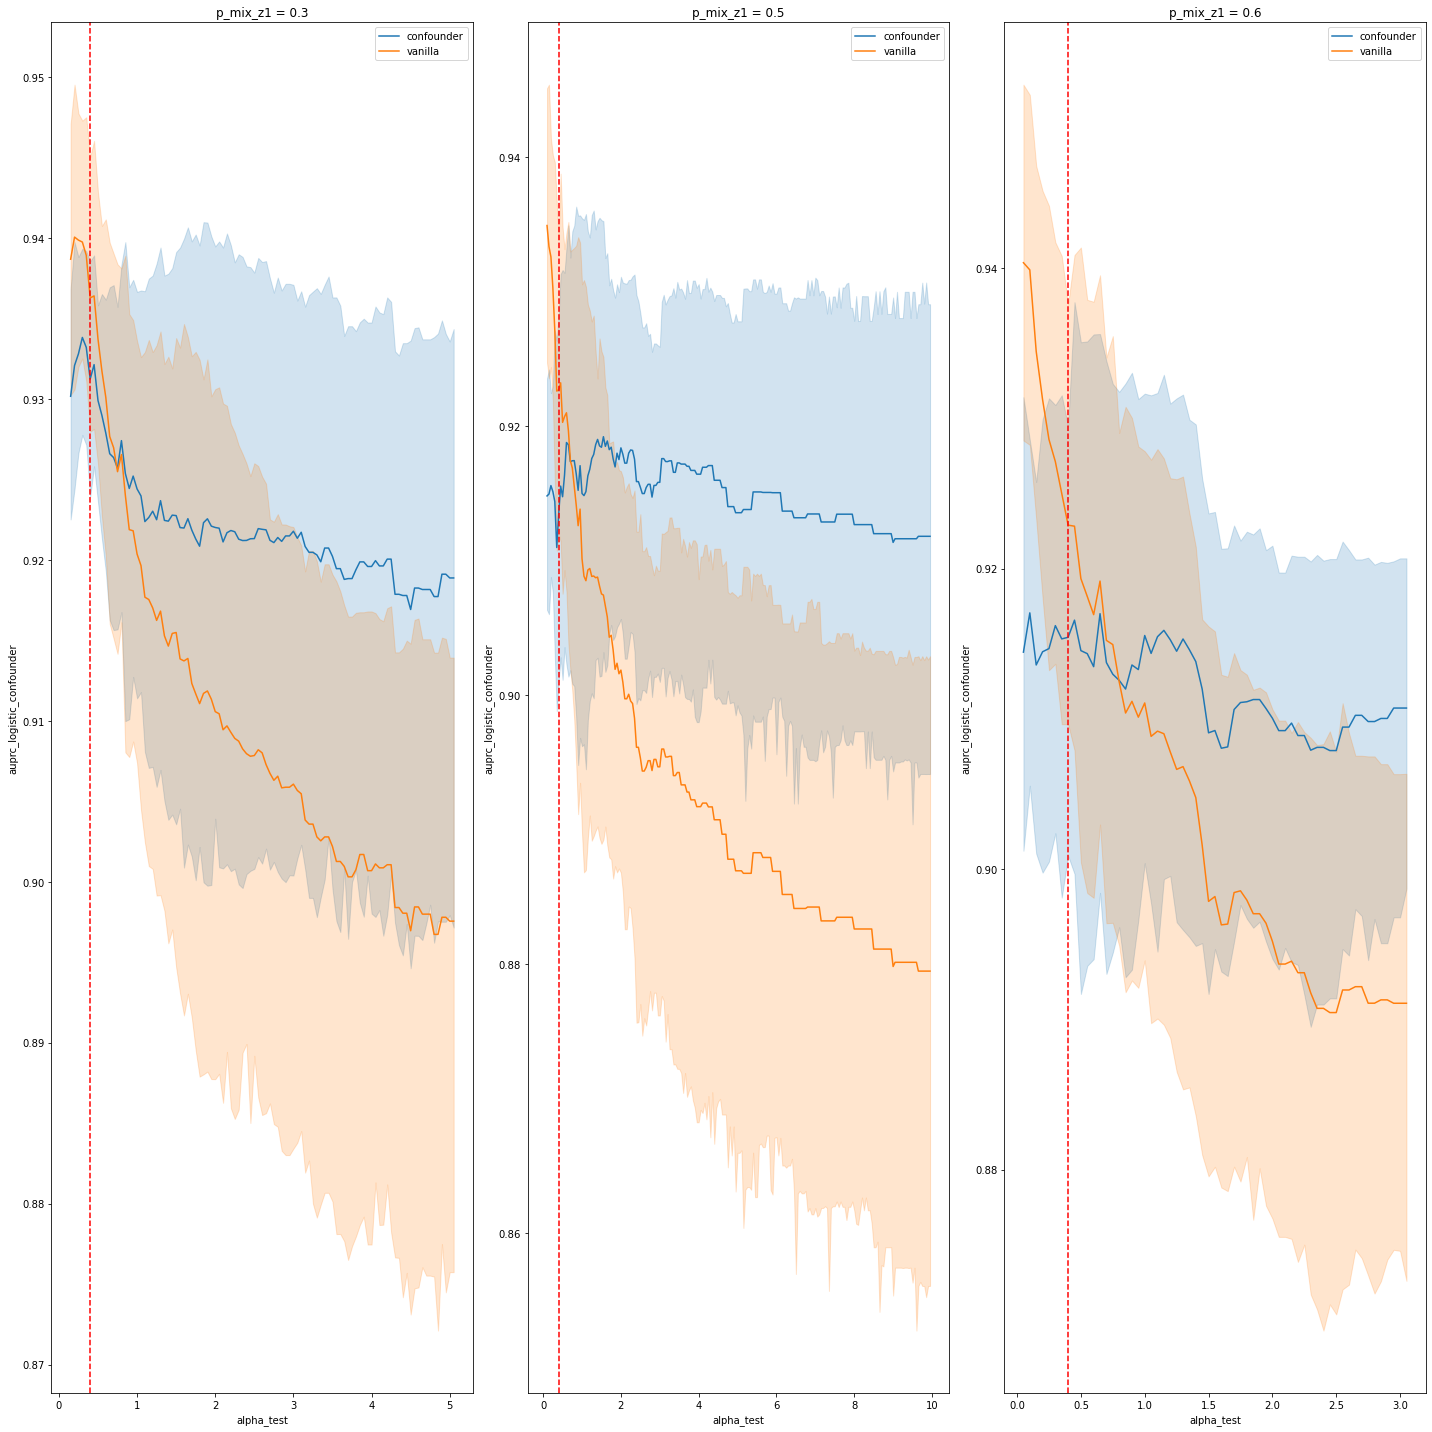

In [1036]:
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,20))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="confounder")
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla")
 
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()
plt.tight_layout()

In [1007]:
_df.columns

Index(['auprc_logistic_confounder', 'auprc_logistic_vanilla',
       'auprc_logistic_confounder_df0', 'auprc_logistic_confounder_df1',
       'precision_confounder', 'recall_confounder', 'f1_confounder',
       'auprc_logistic_vanilla_df0', 'auprc_logistic_vanilla_df1',
       'precision_vanilla', 'recall_vanilla', 'f1_vanilla', 'p_pos_train_z0',
       'p_pos_train_z1', 'p_pos_train', 'p_pos_test', 'p_mix_z0', 'p_mix_z1',
       'alpha_train', 'alpha_test', 'p_pos_test_z0', 'p_pos_test_z1', 'C_y',
       'C_z', 'n_train', 'n_test', 'n_z0_pos_train', 'n_z0_neg_train',
       'n_z0_pos_test', 'n_z0_neg_test', 'n_z1_pos_train', 'n_z1_neg_train',
       'n_z1_pos_test', 'n_z1_neg_test', 'run', 'distance_KL_Train_Test',
       'distance_EMD'],
      dtype='object')

In [ ]:
xlabel = "alpha_test"
xlabel_reverse = "reverse_alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,10))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].copy()
    _df[xlabel_reverse] = (_df[xlabel]**(-1))
    _df[xlabel_log] = np.log10(_df[xlabel])
    
    g_results=sns.lineplot(data=_df, x=xlabel, y='f1_confounder', ax=ax[idx], label="confounder")
    g_results=sns.lineplot(data=_df, x=xlabel, y='f1_vanilla', ax=ax[idx], label="vanilla")
    g_results.set(xscale="log")
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()
plt.tight_layout()

In [1037]:
fname

'../output/regressionSHAC/binaryUnigram_05_02_500_l2_C1_V10'

In [921]:
# better version for save
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()[1:-1]
# p_mix_z1 = df['p_mix_z1'].unique()[1:4]
p_mix_z1 = [0.3,0.5,0.6]

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(15,4))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'].round(2) == k].sort_values(xlabel)
    
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="BA")
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla", linestyle='dotted')
    # g_results.set(xscale="log")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"$P(z=1)$ = {round(k,3)}")
    ax[idx].legend()
    ax[idx].set(xlabel=r"$\alpha_{test}$", ylabel="AUPRC")


plt.tight_layout()

plt.savefig(f"{fname}.png", dpi=400)
plt.close()

In [1041]:
# better version for save
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()[1:-1]
# p_mix_z1 = df['p_mix_z1'].unique()[1:4]
p_mix_z1 = [0.3,0.5,0.6]

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(15,4), sharey=True)
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'].round(2) == k].sort_values(xlabel)
    
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="BA")
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla", linestyle='dotted')
    g_results.set(xscale="log")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"$P(z=1)$ = {round(k,3)}")
    ax[idx].legend()
    ax[idx].set(xlabel=r"$\alpha_{test}$", ylabel="AUPRC")
    sample_count = np.around(np.around(np.logspace(math.log10(min(_df[xlabel])),math.log10(max(_df[xlabel])),6)/0.05,decimals=0)*0.05, decimals=2)
    g_results.set(xticks=sample_count)
    g_results.set(xticklabels=sample_count)

plt.tight_layout()

plt.savefig(f"{fname}_logScale.png", dpi=400)
plt.close()

In [ ]:
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,20))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].sort_values("alpha_test")
    
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df0', ax=ax[idx], label="confounder-df0", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df1', ax=ax[idx], label="confounder-df1", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df0', ax=ax[idx], label="vanilla-df0", alpha=0.6,linestyle='dashed')
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df1', ax=ax[idx], label="vanilla-df1", alpha=0.6,linestyle='dashed')
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_confounder'], label="confounder")
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_vanilla'], label="vanilla")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()
plt.tight_layout()

In [ ]:
xlabel = "distance_EMD"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,20))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df0', ax=ax[idx], label="confounder-df0", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df1', ax=ax[idx], label="confounder-df1", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df0', ax=ax[idx], label="vanilla-df0", alpha=0.6,linestyle='dashed')
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df1', ax=ax[idx], label="vanilla-df1", alpha=0.6,linestyle='dashed')
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_confounder'], label="confounder")
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_vanilla'], label="vanilla")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()
plt.tight_layout()

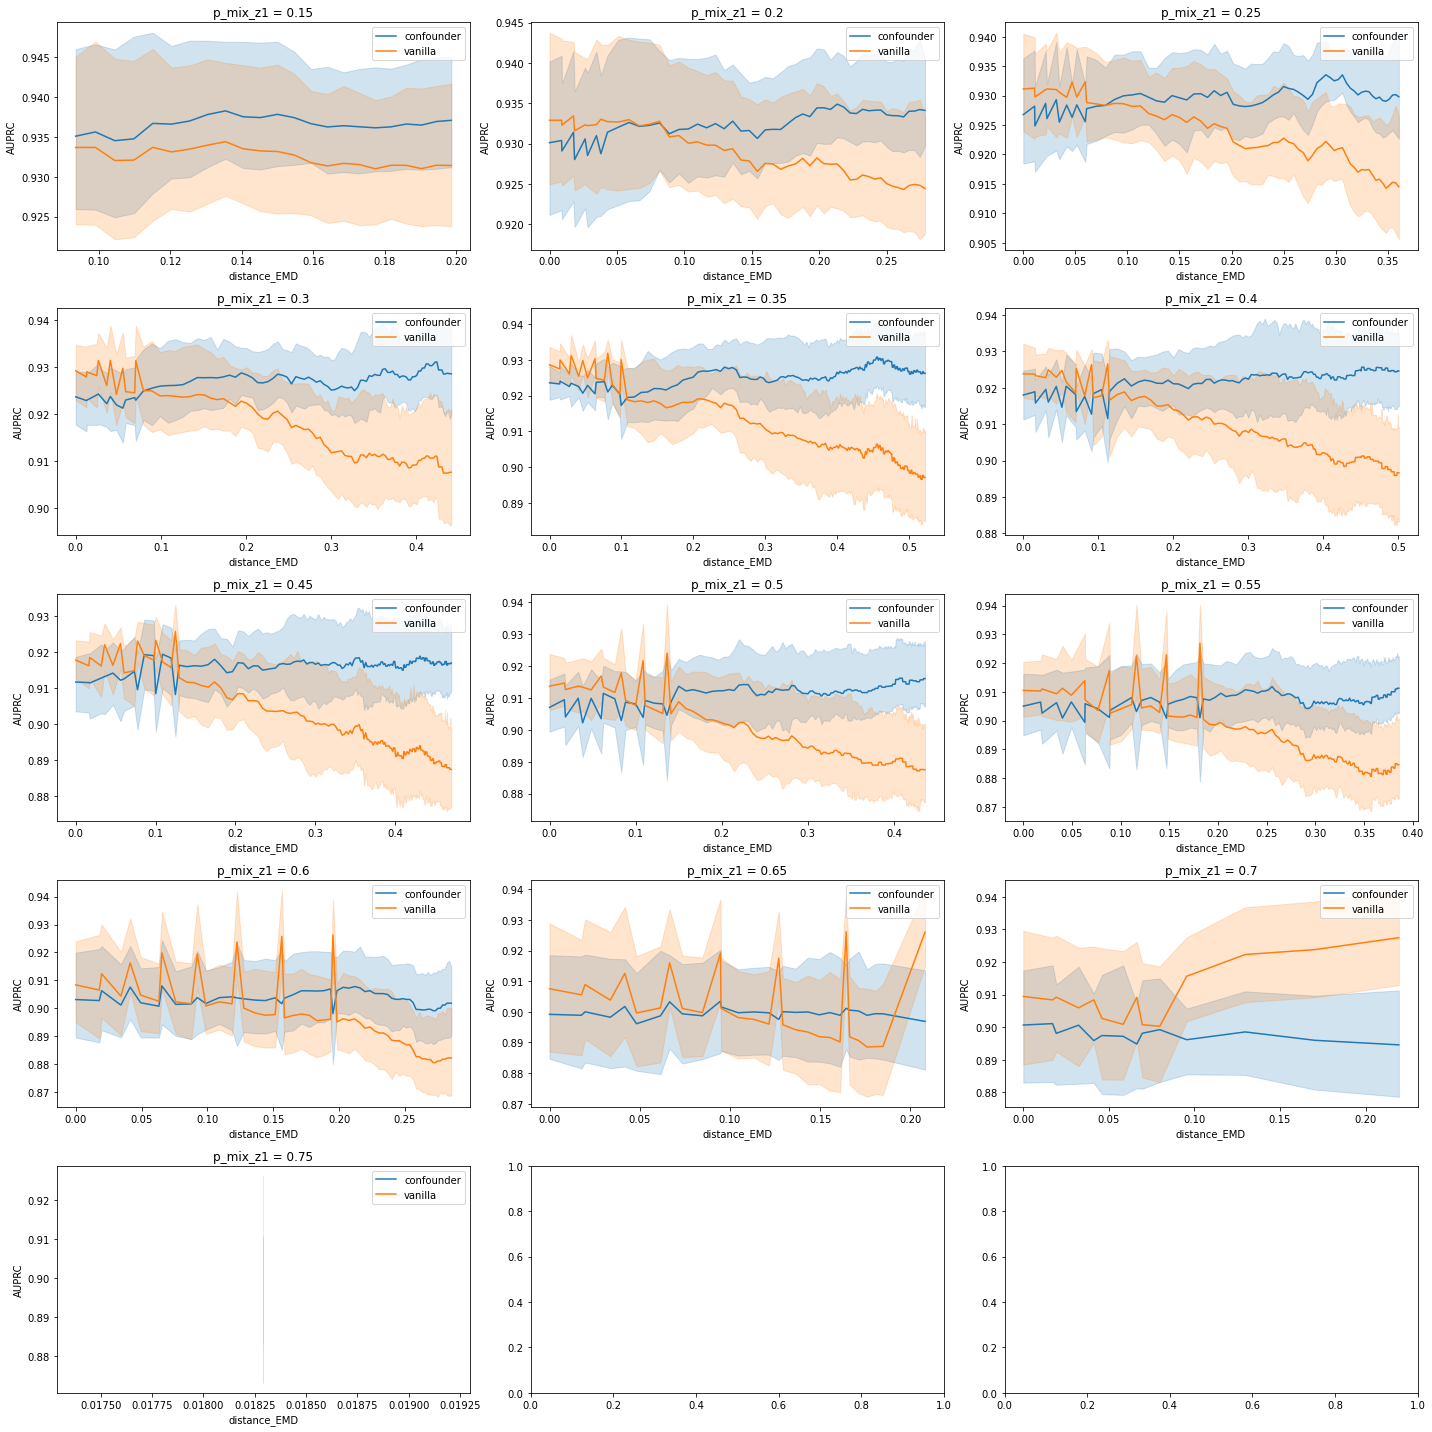

In [811]:
xlabel = "distance_EMD"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,20))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="confounder")
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla")
    
    ax[idx].set_xlabel(xlabel)
    ax[idx].set_ylabel("AUPRC")
    # ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()

plt.tight_layout()

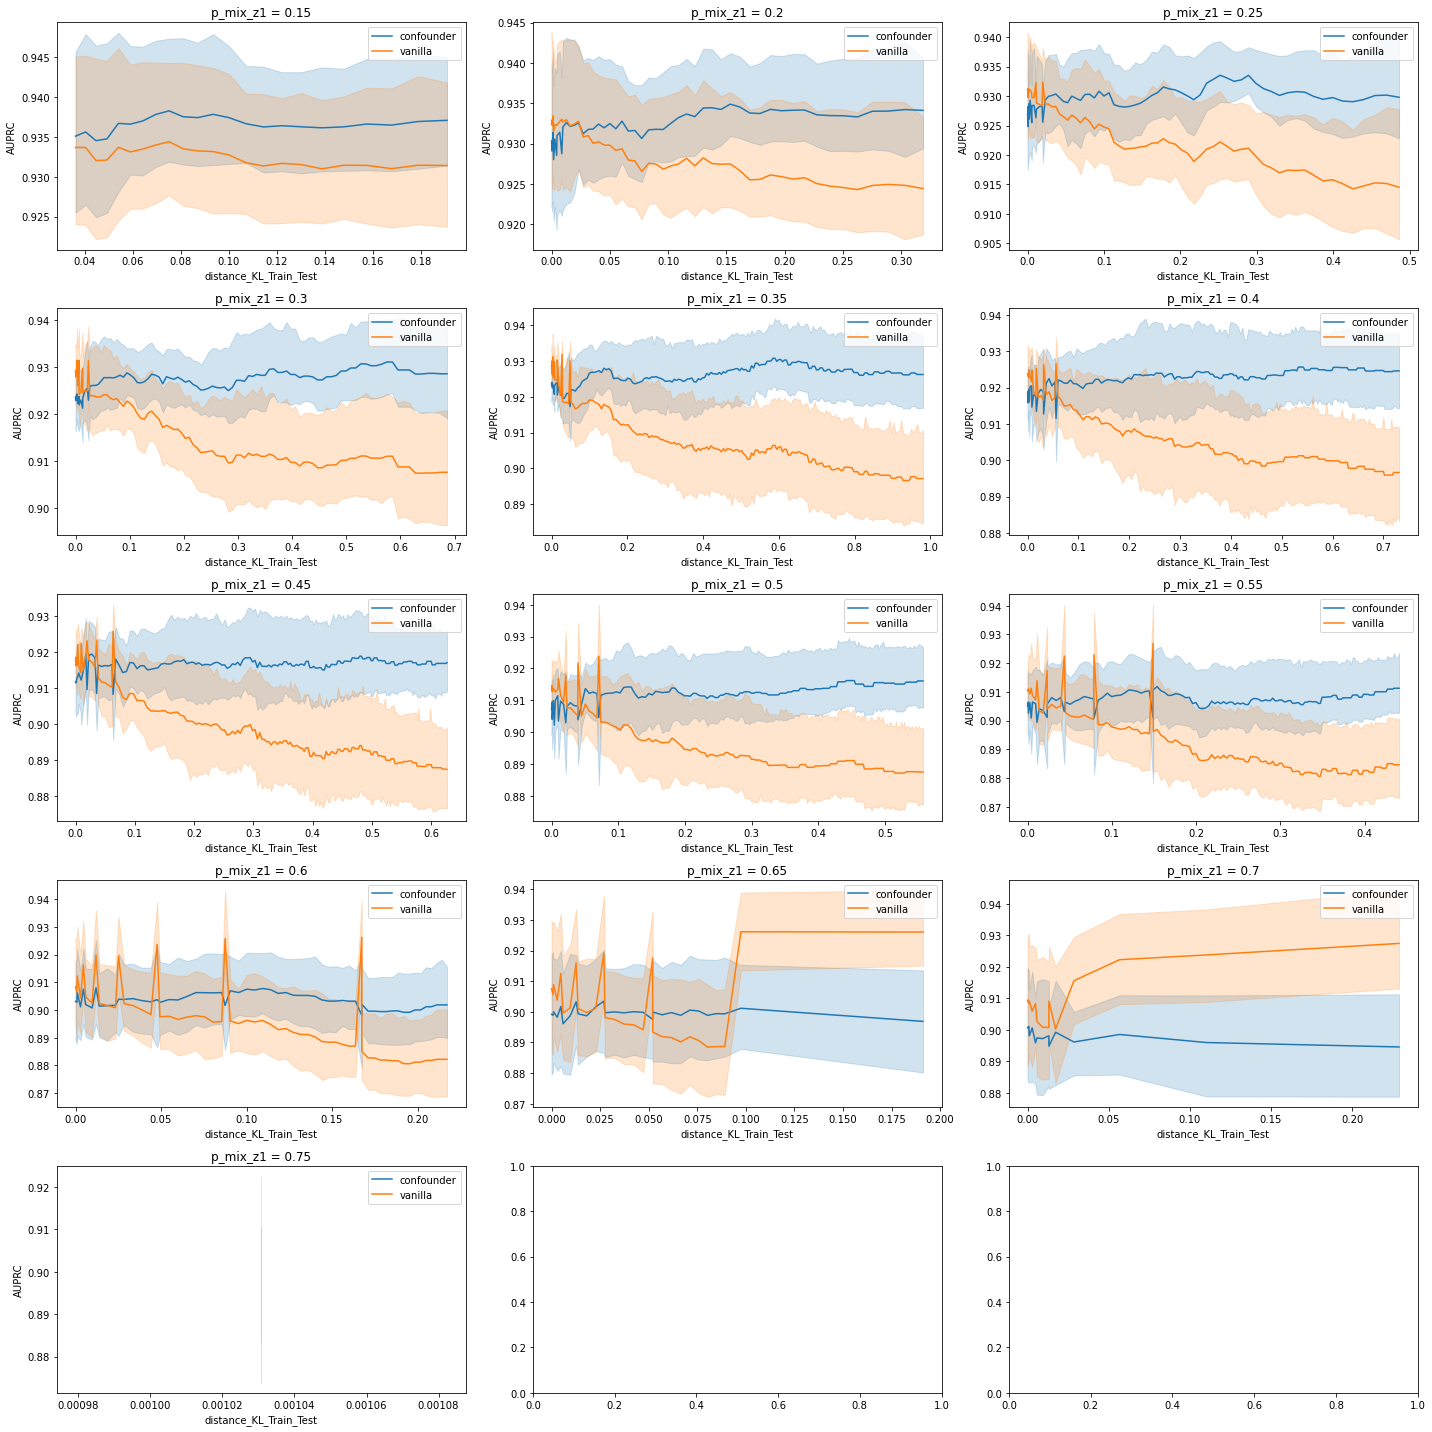

In [812]:
xlabel = "distance_KL_Train_Test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,20))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="confounder")
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla")
    
    ax[idx].set_xlabel(xlabel)
    ax[idx].set_ylabel("AUPRC")
    # ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()

plt.tight_layout()

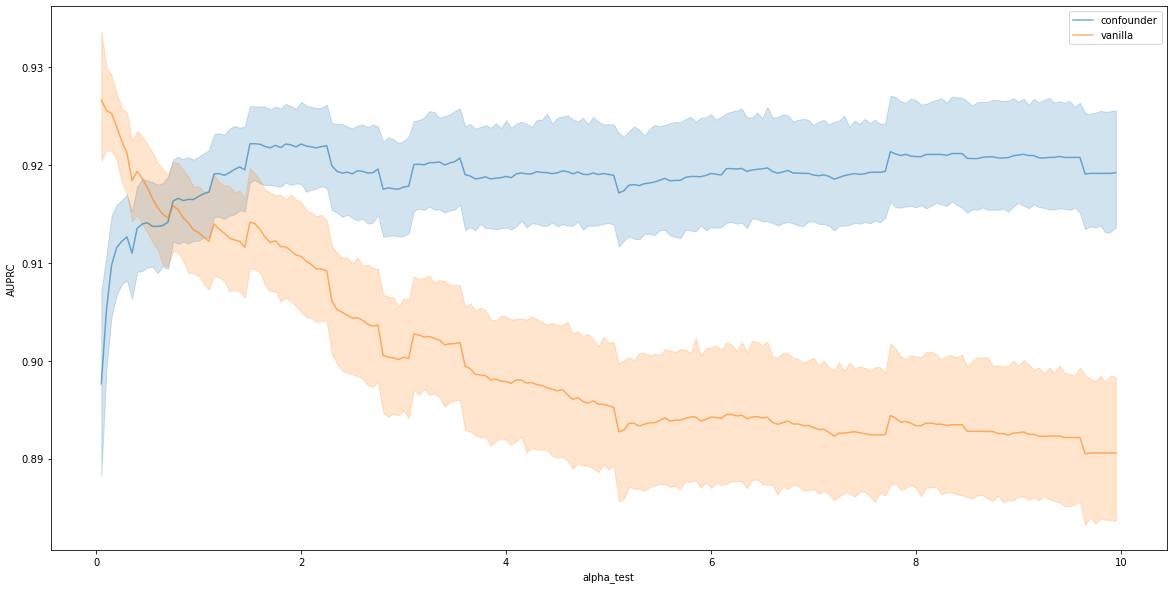

In [813]:
# xlabel = "distance_KL_Train_Test"
xlabel="alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(1,1, figsize=(20,10))


_df = df.sort_values(xlabel)

sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', label="confounder", alpha=0.6)
sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', label="vanilla", alpha=0.6)

# ax.plot(_df[xlabel], _df['auprc_logistic_confounder'], label="confounder", alpha=0.6)
# ax.plot(_df[xlabel], _df['auprc_logistic_vanilla'], label="vanilla", alpha=0.6)

ax.set_xlabel(xlabel)
ax.set_ylabel("AUPRC")
# ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
ax.legend()


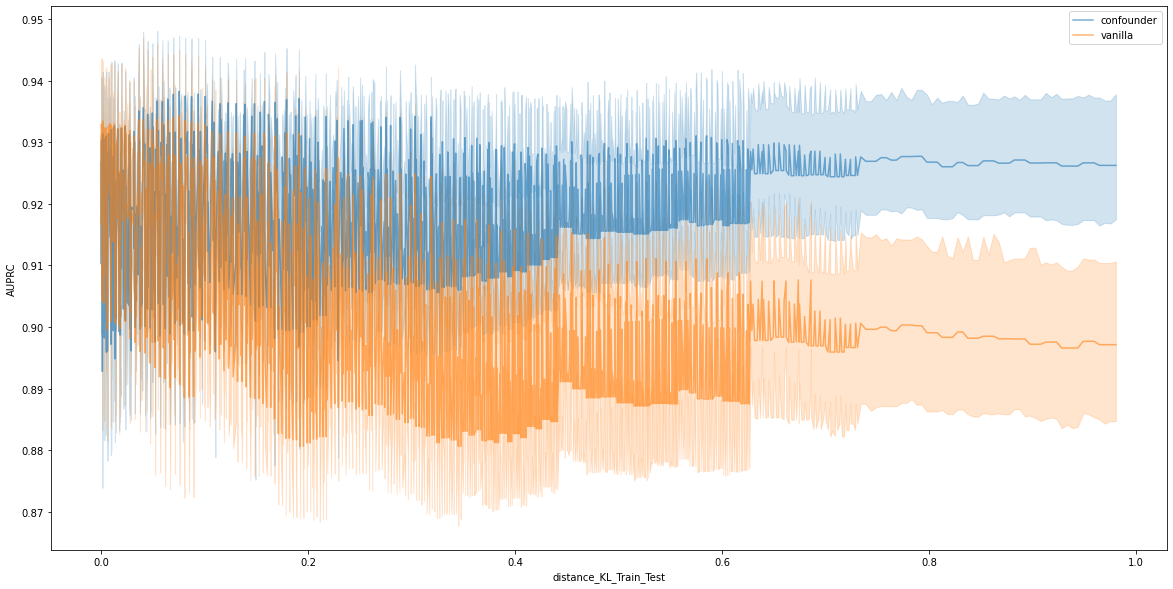

In [814]:
xlabel = "distance_KL_Train_Test"
# xlabel="alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(1,1, figsize=(20,10))


_df = df.sort_values(xlabel)

sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', label="confounder", alpha=0.6)
sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', label="vanilla", alpha=0.6)

# ax.plot(_df[xlabel], _df['auprc_logistic_confounder'], label="confounder", alpha=0.6)
# ax.plot(_df[xlabel], _df['auprc_logistic_vanilla'], label="vanilla", alpha=0.6)

ax.set_xlabel(xlabel)
ax.set_ylabel("AUPRC")
# ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
ax.legend()


## Scatter Plot

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(28,10))
xlabel = "distance_KL_Test_Train"
_df = df.sort_values(xlabel)

for idx, k in enumerate(["auprc_logistic_vanilla", "auprc_logistic_confounder"]):
    
    im = ax[idx].scatter(_df["p_pos_test_z0"], _df["p_pos_test_z1"], c=_df[k], cmap='Blues')
    im.set_clim(0.8,1)
    ax[idx].set_xlabel("p_pos_test_z0")
    ax[idx].set_ylabel("p_pos_test_z1")
    ax[idx].set_title(k)

    fig.colorbar(im, ax=ax[idx])

In [584]:
pd.options.display.max_columns = None

In [643]:

df[(df['p_pos_test_z0'].round(3)==0.5)
    & (df['p_pos_test_z1'].round(2)==0.2) 
    & (df['run']==0) 
    & (df['p_mix_z1'].round(3)==0.4)
   ]


,auprc_logistic_confounder,auprc_logistic_vanilla,p_pos_train_z0,p_pos_train_z1,p_pos_train,p_pos_test,p_mix_z0,p_mix_z1,alpha_train,alpha_test,p_pos_test_z0,p_pos_test_z1,C_y,C_z,n_train,n_test,n_z0_pos_train,n_z0_neg_train,n_z0_pos_test,n_z0_neg_test,n_z1_pos_train,n_z1_neg_train,n_z1_pos_test,n_z1_neg_test,run
440,0.924109,0.925047,0.5,0.2,0.38,0.38,0.6,0.4,0.4,0.4,0.5,0.2,0.38,0.4,2000,500,600,600,150,150,160,640,40,160,0
6875,0.924975,0.928277,0.5,0.2,0.38,0.38,0.6,0.4,0.4,0.4,0.5,0.2,0.38,0.4,2000,500,600,600,150,150,160,640,40,160,0
13310,0.921308,0.922276,0.5,0.2,0.38,0.38,0.6,0.4,0.4,0.4,0.5,0.2,0.38,0.4,2000,500,600,600,150,150,160,640,40,160,0
19745,0.884097,0.887660,0.5,0.2,0.38,0.38,0.6,0.4,0.4,0.4,0.5,0.2,0.38,0.4,2000,500,600,600,150,150,160,640,40,160,0


In [632]:

auprc_vanilla_target = _df[(_df['p_pos_test_z0'].round(3)==0.5) 
                           & (_df['p_pos_test_z1'].round(2)==0.2) 
                           & (_df['p_mix_z1'].round(3)==0.4)
                           & (_df['run']==0)]['auprc_logistic_vanilla'].values[0]


In [633]:
auprc_vanilla_target

0.9073533029204879

In [708]:
df[
    (df['run']==0) 
    # & (df['p_mix_z1'].round(3)==0.4)
    & (df['p_pos_test_z0'].round(3) == 0.5)
    & (df['p_pos_test_z1'].round(3) == 0.2)
   ]

,auprc_logistic_confounder,auprc_logistic_vanilla,auprc_logistic_confounder_df0,auprc_logistic_confounder_df1,auprc_logistic_vanilla_df0,auprc_logistic_vanilla_df1,p_pos_train_z0,p_pos_train_z1,p_pos_train,p_pos_test,p_mix_z0,p_mix_z1,alpha_train,alpha_test,p_pos_test_z0,p_pos_test_z1,C_y,C_z,n_train,n_test,n_z0_pos_train,n_z0_neg_train,n_z0_pos_test,n_z0_neg_test,n_z1_pos_train,n_z1_neg_train,n_z1_pos_test,n_z1_neg_test,run,distance_KL_Train_Test,distance_EMD
27,0.921919,0.923724,0.931210,0.837970,0.931489,0.840864,0.5,0.2,0.440,0.440,0.80,0.20,0.4,0.4,0.5,0.2,0.440,0.20,2000,500,800,800,200,200,80,320,20,80,0,8.881784e-17,5.551115e-17
80,0.926205,0.927575,0.934919,0.875181,0.935205,0.867807,0.5,0.2,0.425,0.425,0.75,0.25,0.4,0.4,0.5,0.2,0.425,0.25,2000,500,750,750,188,187,100,400,25,100,0,-8.326673e-18,1.110223e-16
149,0.925771,0.927832,0.937303,0.868832,0.937447,0.873038,0.5,0.2,0.410,0.410,0.70,0.30,0.4,0.4,0.5,0.2,0.410,0.30,2000,500,700,700,175,175,120,480,30,120,0,0.000000e+00,0.000000e+00
249,0.914197,0.918967,0.932172,0.848686,0.933949,0.844927,0.5,0.2,0.395,0.395,0.65,0.35,0.4,0.4,0.5,0.2,0.395,0.35,2000,500,650,650,162,163,140,560,35,140,0,0.000000e+00,0.000000e+00
440,0.908783,0.910359,0.927359,0.845593,0.927715,0.834854,0.5,0.2,0.380,0.380,0.60,0.40,0.4,0.4,0.5,0.2,0.380,0.40,2000,500,600,600,150,150,160,640,40,160,0,0.000000e+00,0.000000e+00
638,0.913618,0.913971,0.937544,0.836389,0.936910,0.824883,0.5,0.2,0.365,0.365,0.55,0.45,0.4,0.4,0.5,0.2,0.365,0.45,2000,500,550,550,138,137,180,720,45,180,0,0.000000e+00,0.000000e+00
836,0.906431,0.908968,0.930382,0.841599,0.931224,0.836553,0.5,0.2,0.350,0.350,0.50,0.50,0.4,0.4,0.5,0.2,0.350,0.50,2000,500,500,500,125,125,200,800,50,200,0,0.000000e+00,0.000000e+00
1035,0.904555,0.906005,0.932969,0.845339,0.931150,0.838949,0.5,0.2,0.335,0.335,0.45,0.55,0.4,0.4,0.5,0.2,0.335,0.55,2000,500,450,450,112,113,220,880,55,220,0,0.000000e+00,0.000000e+00
1189,0.901157,0.902039,0.933137,0.850886,0.930256,0.845319,0.5,0.2,0.320,0.320,0.40,0.60,0.4,0.4,0.5,0.2,0.320,0.60,2000,500,400,400,100,100,240,960,60,240,0,0.000000e+00,0.000000e+00
1250,0.893470,0.898639,0.937530,0.843212,0.935204,0.842528,0.5,0.2,0.305,0.305,0.35,0.65,0.4,0.4,0.5,0.2,0.305,0.65,2000,500,350,350,88,87,260,1040,65,260,0,0.000000e+00,0.000000e+00


In [717]:
min(auprc_ba_target - _df["auprc_logistic_confounder"])

-0.023471186582317727

In [718]:
max(auprc_vanilla_target - _df["auprc_logistic_vanilla"])

0.10032189756821841

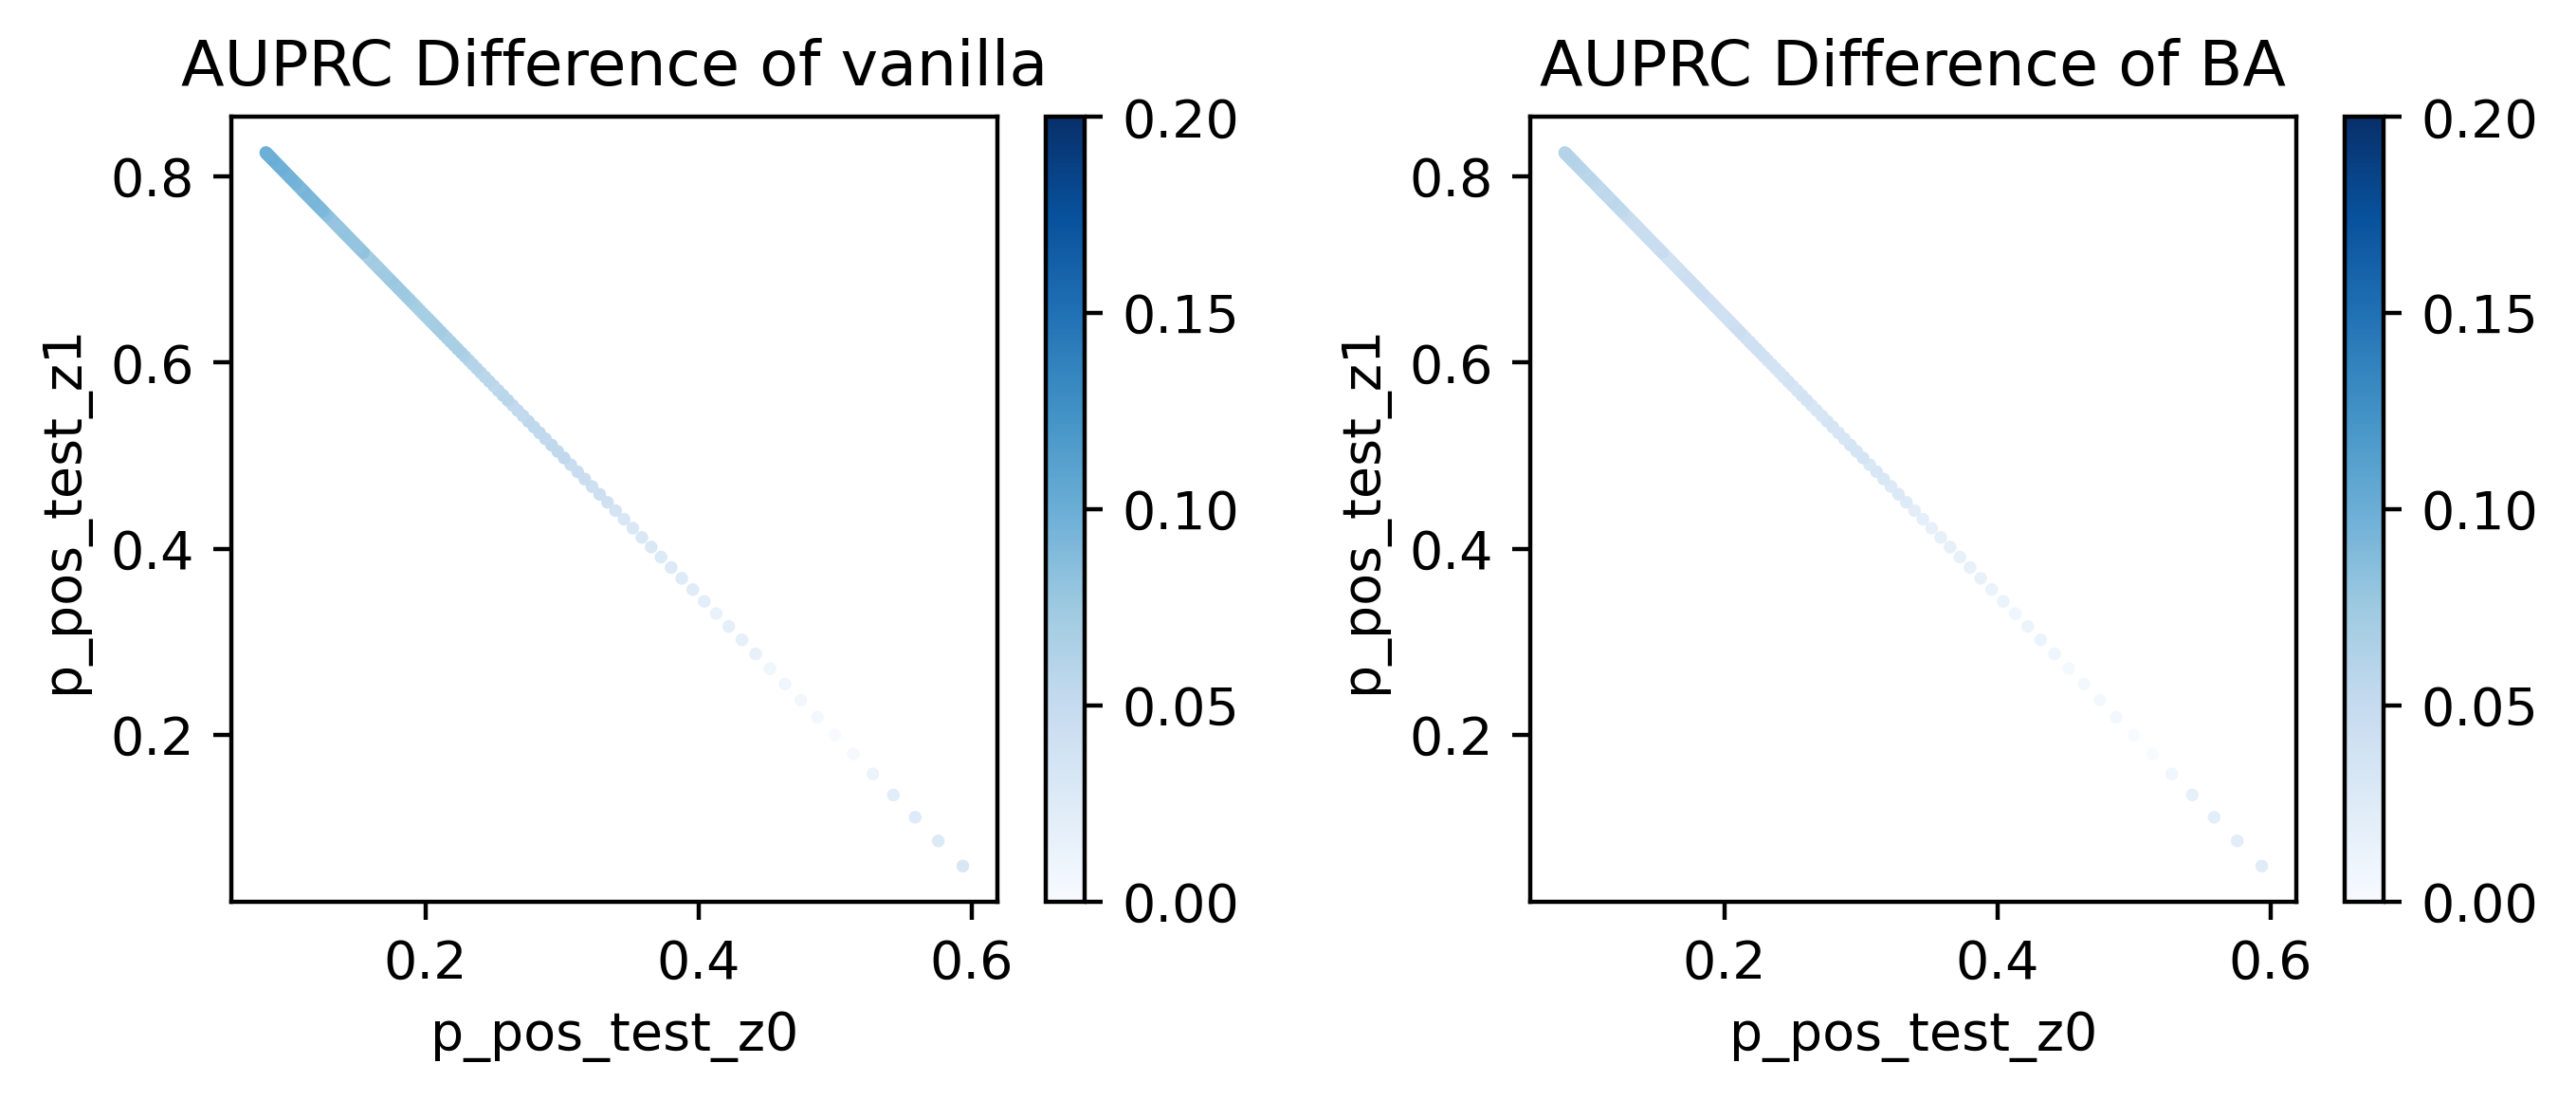

In [720]:
from matplotlib import cm

fig, ax = plt.subplots(1,2, figsize=(7,3),dpi=400)
# xlabel = "distance_KL_Test_Train"



p_mix_z1 = 0.4
_df = df[
    (df['run']==0) 
    & (df['p_mix_z1'].round(3)==p_mix_z1)
   ].copy()






auprc_vanilla_target = _df[(_df['p_pos_test_z0'].round(3)==0.5) 
                           & (_df['p_pos_test_z1'].round(2)==0.2) 
                           & (_df['p_mix_z1'].round(3)==p_mix_z1)
                           & (_df['run']==0)]['auprc_logistic_vanilla'].values[0]


auprc_ba_target = _df[(_df['p_pos_test_z0'].round(3)==0.5) 
                           & (_df['p_pos_test_z1'].round(2)==0.2) 
                           & (_df['p_mix_z1'].round(3)==p_mix_z1)
                           & (_df['run']==0)]['auprc_logistic_confounder'].values[0]


im = ax[0].scatter(_df["p_pos_test_z0"], _df["p_pos_test_z1"], 
                   c=abs(auprc_vanilla_target - _df["auprc_logistic_vanilla"]), cmap='Blues',
                   s=2
                  )
im.set_clim(0,0.2)
ax[0].set(xlabel="p_pos_test_z0", ylabel="p_pos_test_z1", title="AUPRC Difference of vanilla")

fig.colorbar(im, ax=ax[0])



im = ax[1].scatter(_df["p_pos_test_z0"], _df["p_pos_test_z1"], 
                   c=abs(auprc_ba_target - _df["auprc_logistic_confounder"]), cmap='Blues',
                   s=2
                  )
im.set_clim(0,0.2)
ax[1].set(xlabel="p_pos_test_z0", ylabel="p_pos_test_z1", title="AUPRC Difference of BA")
# plt.ylabel("p_pos_test_z1")
# plt.title("AUPRC of BA")

fig.colorbar(im, ax=ax[1])



plt.tight_layout()

In [ ]:
df.query("0.67 < distance_KL_Test_Train < 0.75").sort_values("distance_KL_Test_Train")

## Check some diagnosis

### Corr Plot

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(x_transform_test).iloc[:, :].corr(), vmin=-1, vmax=1)

### R2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_true=y_test, y_pred=y_probs_vanilla[:, 1])

In [ ]:
r2_score(y_true=y_test, y_pred=y_probs_confound[:, 1])

In [ ]:
def r2AndAdjusted(y_true, y_pred, np):
    n = len(y_true)
    
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    r2_adjusted = 1-(1-r2)*(n-1)/(n-np-1)
    
    return r2, r2_adjusted
    

In [ ]:
r2AndAdjusted(y_true=y_test, y_pred=y_probs_vanilla[:, 1], np=384)

In [ ]:
# auprc_logistic_confounder

# auprc_logistic_vanilla

In [ ]:
x_transform_train.shape

### Deviance Residuals

In [ ]:
def deviance(X, y, model):
    return 2*metrics.log_loss(y, model.predict_proba(X), normalize=False)

In [ ]:
deviance(X=x_transform_test, y=y_test, model=clf_vanilla)

### Calibration

In [ ]:
from sklearn.calibration import calibration_curve
prob_true_vanilla, prob_pred_vanilla = calibration_curve(y_true=y_test, y_prob=y_probs_vanilla[:,1], n_bins=10)
prob_true_confound, prob_pred_confound = calibration_curve(y_true=y_test, y_prob=y_probs_confound[:,1], n_bins=10)


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(prob_pred_vanilla, prob_true_vanilla, label='vanilla')
ax.plot(prob_pred_confound, prob_true_confound, label='confound')

ax.plot([0,1],[0,1], "--", color='gray')
ax.legend()
